## P1-RETAIL CASE STUDY

**1. Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to
keep all customers who have done transactions with us and select the join type accordingly.**

In [32]:
import pandas as pd

# Loading the datasets
customers = pd.read_csv("Customer.csv")
transactions = pd.read_csv("prod_cat_info.csv")
product_hierarchy = pd.read_csv("Transactions.csv")

In [44]:
#Renaming the column as join operations need to be performed.
product_hierarchy = product_hierarchy.rename(columns={'cust_id': 'customer_Id'})
transactions=transactions.rename(columns={'prod_sub_cat_code': 'prod_subcat_code'})

In [38]:
customers 

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0
...,...,...,...,...
5642,274474,19-12-1992,M,2.0
5643,267666,24-12-1992,M,6.0
5644,270476,25-12-1992,F,3.0
5645,269626,27-12-1992,F,5.0


In [57]:
transactions

,prod_cat_code,prod_cat,prod_subcat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women
5,2,Footwear,4,Kids
6,3,Electronics,4,Mobiles
7,3,Electronics,5,Computers
8,3,Electronics,8,Personal Appliances
9,3,Electronics,9,Cameras


In [56]:
product_hierarchy

,transaction_id,customer_Id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop


In [66]:
# Merge the datasets and adjust the column names.
customer_final = (customers
                  .merge(product_hierarchy, on='customer_Id', how='inner')
                  .merge(transactions, on='prod_subcat_code', how='inner'))

customer_final = customer_final.drop('prod_cat_code_y', axis=1)
customer_final=customer_final.rename(columns={'prod_cat_code_x': 'prod_cat_code'})
customer_final

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,268408,02-01-1970,M,4.0,87243835584,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,Fiction
1,275152,16-01-1970,M,4.0,73109425404,25-03-2011,7,5,2,464,97.440,1025.440,e-Shop,Books,Fiction
2,275034,18-01-1970,F,4.0,64777271023,23-05-2011,7,5,2,197,41.370,435.370,Flagship store,Books,Fiction
3,270829,22-01-1970,F,8.0,87174343938,9/12/2013,7,5,4,1141,479.220,5043.220,e-Shop,Books,Fiction
4,267657,29-01-1970,F,7.0,76242744953,23-05-2013,7,5,4,1020,428.400,4508.400,e-Shop,Books,Fiction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57161,272141,02-12-1992,F,10.0,79059585885,25-10-2012,5,3,2,1354,284.340,2992.340,e-Shop,Electronics,Computers
57162,269719,04-12-1992,F,8.0,70553332101,23-11-2013,5,3,2,623,130.830,1376.830,Flagship store,Electronics,Computers
57163,275051,04-12-1992,M,5.0,77933614379,18-05-2013,5,3,5,1095,574.875,6049.875,e-Shop,Electronics,Computers
57164,270695,05-12-1992,F,6.0,2300510157,20-11-2012,5,3,3,906,285.390,3003.390,TeleShop,Electronics,Computers


**2. Prepare a summary report for the merged data set.**

**A.Get the column names and their corresponding data types**

In [67]:
print(customer_final.dtypes)

customer_Id           int64
DOB                  object
Gender               object
city_code           float64
transaction_id        int64
tran_date            object
prod_subcat_code      int64
prod_cat_code         int64
Qty                   int64
Rate                  int64
Tax                 float64
total_amt           float64
Store_type           object
prod_cat             object
prod_subcat          object
dtype: object


**B.Top/Bottom 10 observations**

In [68]:
print(customer_final.head(10))
print(customer_final.tail(10))

   customer_Id         DOB Gender  city_code  transaction_id   tran_date  \
0       268408  02-01-1970      M        4.0     87243835584  13-01-2014   
1       275152  16-01-1970      M        4.0     73109425404  25-03-2011   
2       275034  18-01-1970      F        4.0     64777271023  23-05-2011   
3       270829  22-01-1970      F        8.0     87174343938   9/12/2013   
4       267657  29-01-1970      F        7.0     76242744953  23-05-2013   
5       274630  01-02-1970      M        4.0     78357345891   11/4/2012   
6       273541  01-02-1970      M        4.0     23916816961    9/2/2013   
7       269008  13-02-1970      F        6.0     35560569829    9/3/2013   
8       269008  13-02-1970      F        6.0     94033312891  26-04-2012   
9       267199  14-02-1970    NaN        2.0     56749259881   11/1/2012   

   prod_subcat_code  prod_cat_code  Qty  Rate      Tax  total_amt  \
0                 7              5    5   187   98.175   1033.175   
1                 7      

**“Five-number summary” for continuous variables (min, Q1, median, Q3 and max)**

In [69]:
print(customer_final.describe())

         customer_Id     city_code  transaction_id  prod_subcat_code  \
count   57166.000000  57151.000000    5.716600e+04      57166.000000   
mean   271015.375101      5.496457    5.017556e+10          5.613949   
std      2426.954106      2.865186    2.896442e+10          3.701183   
min    266783.000000      1.000000    3.268991e+06          1.000000   
25%    268931.000000      3.000000    2.527880e+10          3.000000   
50%    270982.000000      5.000000    5.019132e+10          4.000000   
75%    273096.000000      8.000000    7.551116e+10         10.000000   
max    275265.000000     10.000000    9.998755e+10         12.000000   

       prod_cat_code           Qty          Rate           Tax     total_amt  
count   57166.000000  57166.000000  57166.000000  57166.000000  57166.000000  
mean        3.462425      2.429766    635.022653    248.967409   2102.084532  
std         1.710811      2.273219    623.390431    187.344788   2516.597510  
min         1.000000     -5.000000 

**D.Frequency tables for all the categorical variables**

In [70]:
for col in customer_final.select_dtypes(include='object').columns:
    print(customer_final[col].value_counts())


DOB
17-09-1982    79
27-12-1988    75
25-02-1974    73
20-03-1972    68
21-07-1988    64
              ..
27-01-1988     1
14-09-1989     1
09-07-1990     1
01-01-1991     1
06-02-1989     1
Name: count, Length: 3987, dtype: int64
Gender
M    29191
F    27953
Name: count, dtype: int64
tran_date
25-11-2012    90
13-07-2011    89
7/10/2011     86
23-10-2011    85
4/1/2013      85
              ..
28-02-2014     3
24-02-2014     3
23-02-2014     2
21-02-2014     1
27-02-2014     1
Name: count, Length: 1129, dtype: int64
Store_type
e-Shop            23087
MBR               11644
Flagship store    11324
TeleShop          11111
Name: count, dtype: int64
prod_cat
Books               12179
Clothing            10019
Footwear            10019
Electronics          9910
Home and kitchen     8087
Bags                 6952
Name: count, dtype: int64
prod_subcat
Women                  10019
Mens                    9902
Kids                    7069
Mobiles                 4002
Comics                  3

**3.Generate histograms for all continuous variables and frequency bars for categorical variables.**

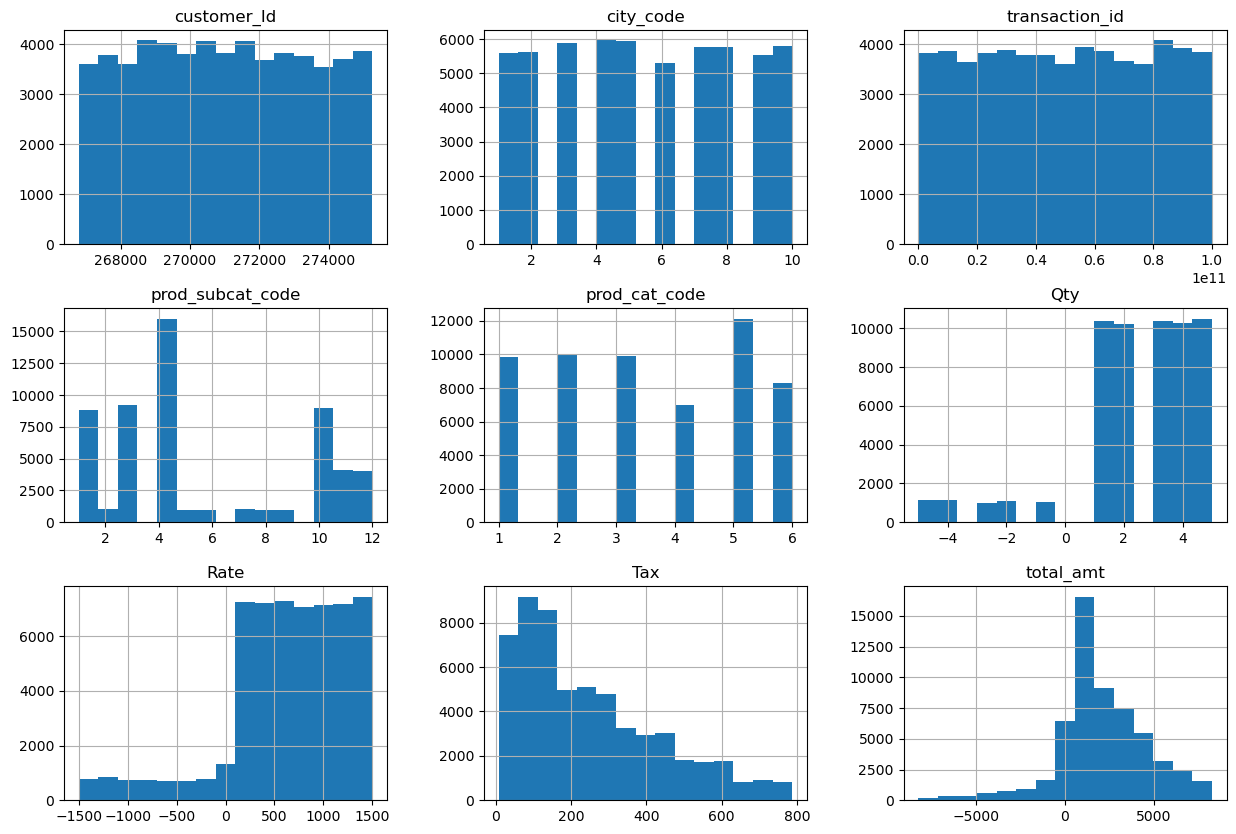

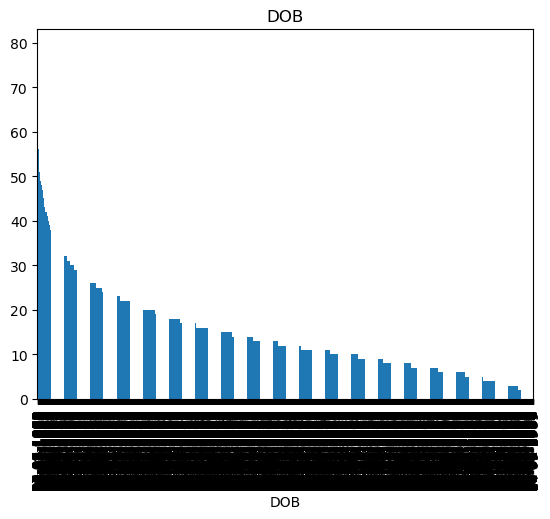

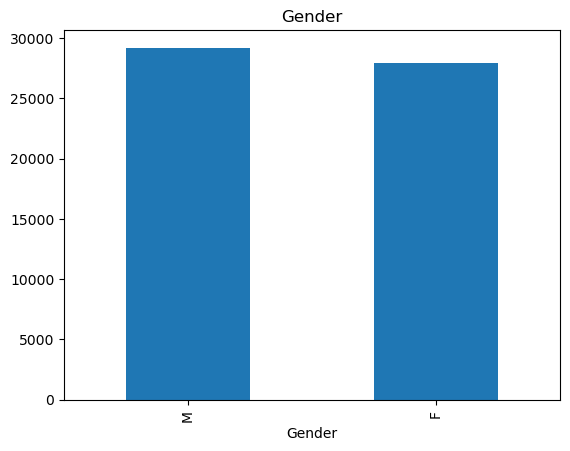

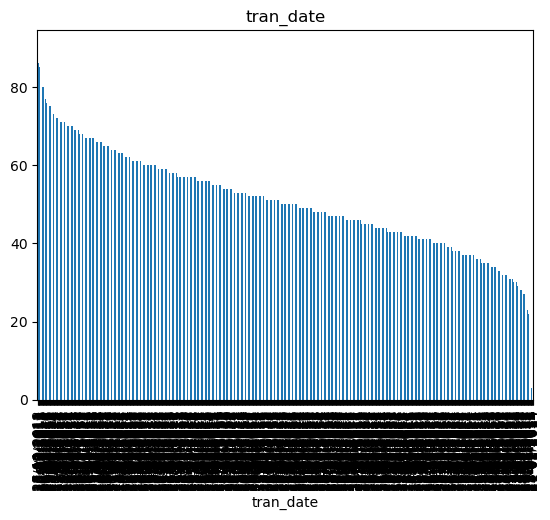

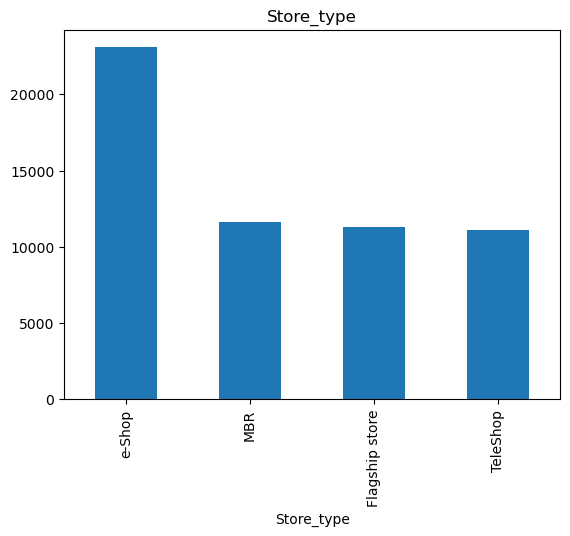

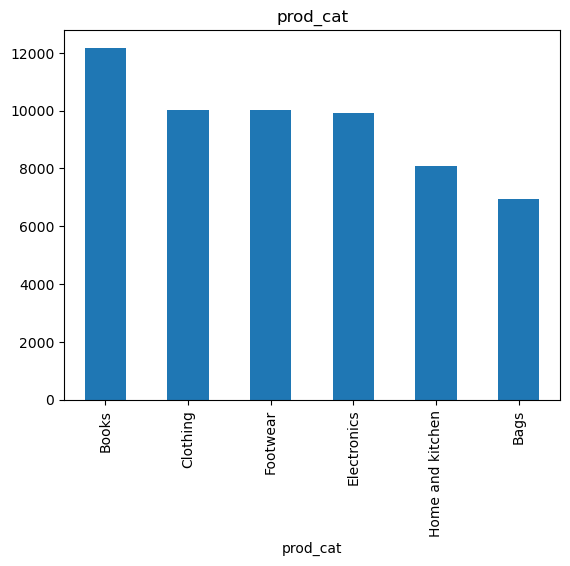

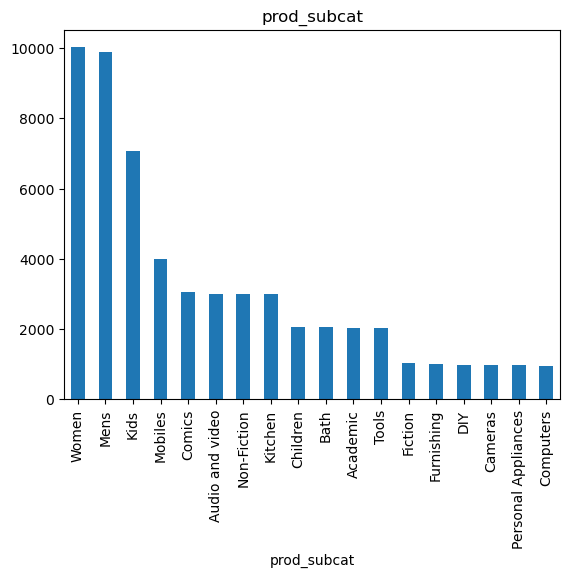

In [72]:
import matplotlib.pyplot as plt

# Let's see Histograms for continuous variables
customer_final.hist(bins=15, figsize=(15, 10))
plt.show()

# And now the frequency bars for categorical variables
for col in customer_final.select_dtypes(include='object').columns:
    customer_final[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.show()

**4.Calculate the following information using the merged dataset :**

**A.Time period of the available transaction data**

In [73]:
print(customer_final['tran_date'].min(), customer_final['tran_date'].max())


1/1/2012 9/9/2013


**B.Count of transactions where the total amount of transaction was negative**

In [74]:
print(customer_final[customer_final['total_amt'] < 0].shape[0])


5430


**5.Analyze which product categories are more popular among females vs male customers.**

In [75]:
popularity_by_gender = customer_final.groupby(['Gender', 'prod_cat'])['transaction_id'].count().unstack().fillna(0)

print(popularity_by_gender)

prod_cat  Bags  Books  Clothing  Electronics  Footwear  Home and kitchen
Gender                                                                  
F         3363   6004      4916         4795      4916              3959
M         3586   6169      5099         5113      5099              4125


**6.Which City code has the maximum customers and what was the percentage of customers from
that city?**

In [78]:
city_counts = customer_final['city_code'].value_counts()
max_city_code = city_counts.idxmax()
percentage = round((city_counts.max() / city_counts.sum()) * 100,2)

print("City Code with Highest Count:", max_city_code)
print("Percentage of Total:", percentage)


City Code with Highest Count: 4.0
Percentage of Total: 10.43


**7.Which store type sells the maximum products by value and by quantity?**

In [82]:
max_value_store = customer_final.groupby('Store_type')['total_amt'].sum().idxmax()
max_quantity_store = customer_final.groupby('Store_type')['Qty'].sum().idxmax()
print("Store type with maximum products by value: ",max_value_store)
print("Store type with maximum products by quantity: ", max_quantity_store)


Store type with maximum products by value:  e-Shop
Store type with maximum products by quantity:  e-Shop


**8.What was the total amount earned from the "Electronics" and "Clothing" categories from
Flagship Stores?**

In [87]:
total_amount = customer_final[(customer_final['prod_cat'].isin(['Electronics', 'Clothing'])) & 
                              (customer_final['Store_type'] == 'Flagship store')]['total_amt'].sum()
print(total_amount)


8526843.0


**9.What was the total amount earned from "Male" customers under the "Electronics" category?**

In [120]:
total_amount_male_electronics =round(customer_final[(customer_final['Gender'] == 'M') & 
                                               (customer_final['prod_cat'] == 'Electronics')]['total_amt'].sum(),2)

print("Total amount earned from Electronics category for Male is: ", total_amount_male_electronics)



Total amount earned from Electronics category for Male is:  6468856.75


**10.How many customers have more than 10 unique transactions, after removing all transactions
which have any negative amounts?**

In [94]:
customer_transactions = customer_final[customer_final['total_amt'] > 0].groupby('customer_Id')['transaction_id'].nunique()
customers_with_10_plus = customer_transactions[customer_transactions > 10].count()\

print("Customers with more than 10 unique transactions: ",customers_with_10_plus)


Customers with more than 10 unique transactions:  6


**11.For all customers aged between 25 - 35, find out:**

**A.What was the total amount spent for “Electronics” and “Books” product categories?**


In [113]:
import pandas as pd
from datetime import datetime


# First lets Convert DOB and tran_date columns to datetime format
customer_final['DOB'] = pd.to_datetime(customer_final['DOB'])
customer_final['tran_date'] = pd.to_datetime(customer_final['tran_date'])

# Now lets Calculate age from DOB using python function:

def calculate_age(dob, tran_date):
    age = tran_date.year - dob.year - ((tran_date.month, tran_date.day) < (dob.month, dob.day))
    return age

customer_final['Age'] = customer_final.apply(lambda row: calculate_age(row['DOB'], row['tran_date']), axis=1)

# Lastly lets Filter for age between 25 and 35 and product categories Electronics or Books
filtered_data = customer_final[(customer_final['Age'].between(25, 35)) &
                               (customer_final['prod_cat'].isin(['Electronics', 'Books']))]

total_amount_25_35 = filtered_data['total_amt'].sum()

print(total_amount_25_35)


13526881.81


**B.What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?**

In [119]:
total_amount_date_range = round(
    customer_final[
        (customer_final['Age'].between(25, 35)) & 
        (customer_final['tran_date'].between('2014-01-01', '2014-03-01'))
    ]['total_amt'].sum(), 2
)

print("Total amount spent by customers between 1st Jan,2014 to 1St March,2014 is: ",total_amount_date_range)


Total amount spent by customers between 1st Jan,2014 to 1St March,2014 is:  1431508.72
